<a href="https://colab.research.google.com/github/Niharika-012/Project/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes = True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Locate the File in google drive
Path = 'drive/My Drive/Dataset'

In [5]:
dataset = pd.read_csv(Path+'/card_transdata.csv')

In [6]:
dataset.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
dataset.isnull().head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [8]:
dataset.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
dataset.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [10]:
# converting float column to int
dataset['repeat_retailer'] = (dataset['repeat_retailer']).astype(int)
dataset['used_chip'] = (dataset['used_chip']).astype(int)
dataset['used_pin_number'] = (dataset['used_pin_number']).astype(int)
dataset['online_order'] = (dataset['online_order']).astype(int)
dataset['fraud'] = (dataset['fraud']).astype(int)

dataset.dtypes


distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

In [11]:
dataset.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


0    912597
1     87403
Name: fraud, dtype: int64


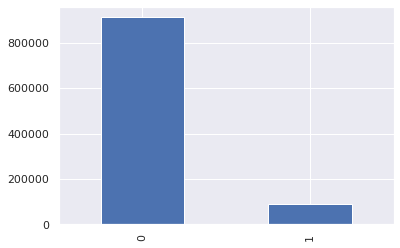

In [14]:
#counting 1 & 0 value from fraud column

color_wheel = {1: "#0392fc" , 2: "#7bc043"}
colors = dataset["fraud"].map(lambda x : color_wheel.get(x+1))
print(dataset.fraud.value_counts())
p = dataset.fraud.value_counts().plot(kind = "bar")

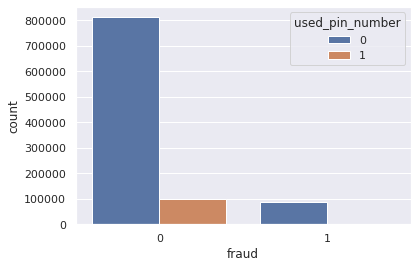

In [15]:
sns.countplot(data = dataset , x = "fraud" , hue = "used_pin_number")

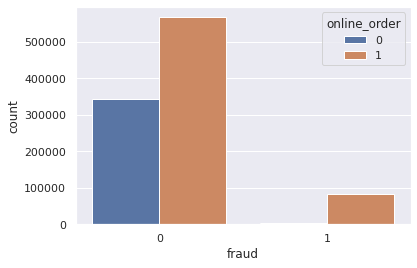

In [16]:
sns.countplot(data = dataset, x = "fraud" , hue = "online_order")

Building Machine learning models


In [17]:
X = dataset.drop('fraud' , axis = 1)
Y = dataset['fraud']

In [20]:
# test size 20 % and training size 80 %
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test , Y_train , Y_test = train_test_split(X,Y , test_size = 0.2 , random_state = 7) 

Naive Bayes


In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , Y_train)

GaussianNB()

In [22]:
Y_pred = nb.predict(X_test)
print("Accuracy Score : ", accuracy_score(Y_test , Y_pred)* 100 , "%")

Accuracy Score :  95.1595 %


Neural Network 


In [23]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train,Y_train)


MLPClassifier()

In [24]:
Y_pred = nn.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test , Y_pred)*100 ,"%")

Accuracy Score :  99.80799999999999 %


Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [26]:
Y_pred = rfc.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test , Y_pred)*100 , "%")

Accuracy Score :  100.0 %


Decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train , Y_train)

DecisionTreeClassifier()

In [28]:
Y_pred = dtree.predict(X_test)
print("Accuracy Score : ", accuracy_score(Y_test , Y_pred)*100 , "%")

Accuracy Score :  99.998 %


Random forest  Visualization

In [29]:
# import classification report and confusion matrix from sklearn
from sklearn.metrics import classification_report , confusion_matrix


Text(0.5, 1.0, 'Acurracy Score : 1.0')

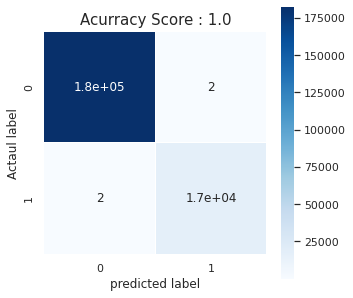

In [32]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize= (5,5))
sns.heatmap(data = cm , linewidths=.5, annot = True , square = True , cmap = 'Blues')
plt.ylabel('Actaul label')
plt.xlabel('predicted label')
all_sample_title = 'Acurracy Score : {0}'.format(rfc.score(X_test, Y_test))
plt.title(all_sample_title, size = 15)

In [46]:
imp_df = pd.DataFrame({"Feature Name": X_train.columns, "Importance":rfc.feature_importances_})
imp_df.sort_values(by = 'Importance',ascending = False)

,Feature Name,Importance
2,ratio_to_median_purchase_price,0.530505
6,online_order,0.160660
0,distance_from_home,0.136188
5,used_pin_number,0.062877
4,used_chip,0.059844
1,distance_from_last_transaction,0.043674
3,repeat_retailer,0.006254
